# Chapter 12

In [ ]:
from tensorflow.python.types import data
one_batch_of_images = test_ds.take(1)
dataset_element = list(one_batch_of_images.as_numpy_iterator())[0]
images = dataset_element[0][0:1]
prediction = loaded_model.predict(images)
print(prediction)



1/1 [==============================] - 0s 257ms/step
[[-4.1246014 -8.23243    2.5934262 -1.3051217 -3.4504077  1.9250008
  -4.550305   1.7886864 -8.466619  -9.168889 ]]


2
(9, 32, 32, 3)
1/1 [==============================] - 0s 20ms/step


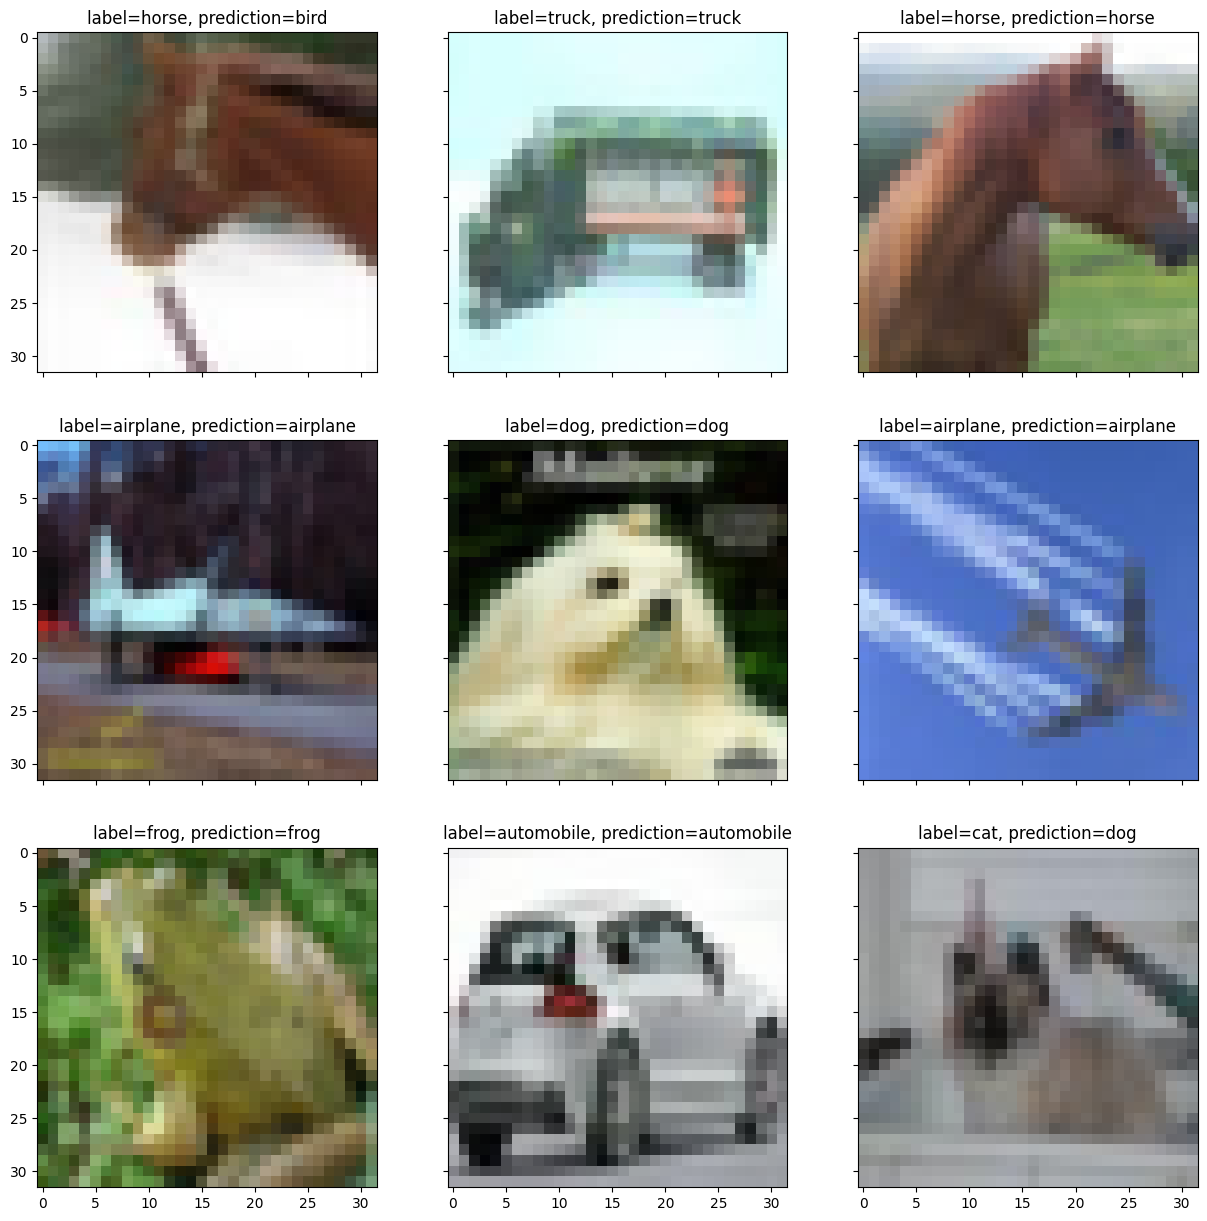

In [ ]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15,15))
from tensorflow.python.types import data
one_batch_of_images = test_ds.take(1)
dataset_elements = list(ds_sample_of_three_images.as_numpy_iterator())[0]
images = dataset_element[0][:9]
prediction = loaded_model_2.predict(images)
ground_truths = dataset_element[1][:9]
for i in range(9):
  y_pred = labels[np.argmax(prediction, axis=1)[i]]
  label = labels[ground_truths[i]]
  ax[i%3][i//3].imshow(images[i].astype("uint8"))
  ax[i%3][i//3].set_title(f"label={label}, prediction={y_pred}")
  i += 1
plt.show()



In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5165b83d7b5a972b85c9cc47ed4bb94626a813741e6d2dc0902f52b1f1c3b7a6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


**Local Interpretable Model-Agnostic Explanations (LIME)**

LIME is a method that has been developed in 2016 aimed at explaining the prediction of a machine learning model. It is model-agnostic, meaning that it works on any machine learning algorithm.  It is also local because it is used to explain the response of the model on a specific input instead of trying to explain its general decision-making as was the case in the previous section.

Lime will rely on an explainable machine learning algorithm, like a regression algorithm or decision tree, to infer an explanation of our model of interest around a specific input. Let us suppose that we want to explain the prediction of a model M on a specific input I.

·Randomly generate input points in the overall input space

·Give a weight to each of the randomly generated points depending on how far they are from our input of interest I. The closer a point is from I, the higher its weight will be. Indeed, Lime is a local algorithm and as such we want to focus on the points that are close to the point I that we want to explain.

·Use the model M to compute the prediction on the points that are close to I.

·Fit an explainable model, for instance a regression algorithm, on the points that are close to our input I using the predictions as the target variable.

·Explain the response of the model M by interpreting the explainable model. For instance, in the case of a regression model, we will use the coefficients of the regression model to explain the output of the model M.



In the case of images, this algorithm needs to be adapted. The randomly generated points will be images inferred from the input image I but with random perturbations. To achieve this, the image is first divided into regions called superpixels. Those superpixels are generated by using an algorithm that will cluster similar adjacent pixels together. Once the regions are created, the perturbed images are generated by randomly turning off certain superpixels by making them all black or all grey for instance. These randomly perturbed images correspond to the randomly generated points seen above.

The next step is to run a prediction on those perturbed images that are closest to the initial image. That will give us a new dataset.
Then, we can fit a linear model on the generated dataset, with the features being the superpixels, that can be either on or off. As a result, we get a coefficient associated to each superpixel representing how it is contributing to the prediction.

Conveniently enough, there is a Lime library that has a module dedicated to images, called lime_image.

In [ ]:
%load_ext autoreload
%autoreload 2
import os,sys
import lime
#except:
#    sys.path.append(os.path.join('..', '..')) # add the current directory
#    import lime
from lime import lime_image

In [ ]:
lime_image_explainer = lime_image.LimeImageExplainer()

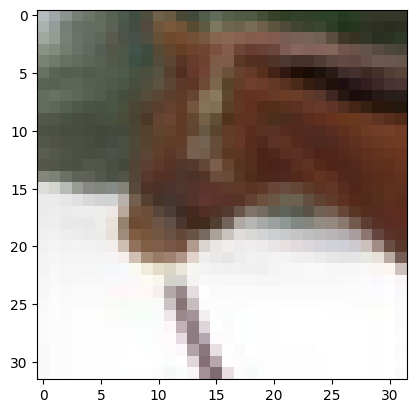

In [ ]:
plt.imshow(images[0])

In [ ]:
explanation_wrong_prediction = lime_image_explainer.explain_instance(
    images[0].astype('uint8').astype('double'), loaded_model.predict, top_labels=5, hide_color=0, num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


Now let us use it to explain a specific prediction. We will start with a prediction that the model has got correct.

In our case we are taking the picture of the frog below

In [ ]:
from skimage.segmentation import mark_boundaries

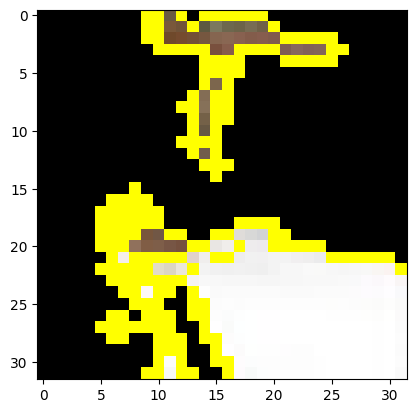

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=2, hide_rest=True)
plt.imshow(mark_boundaries((temp).astype('uint8'), mask))

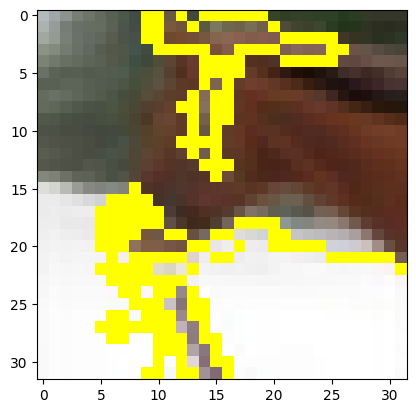

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=2, hide_rest=False)
plt.imshow(mark_boundaries((temp).astype('uint8'), mask))

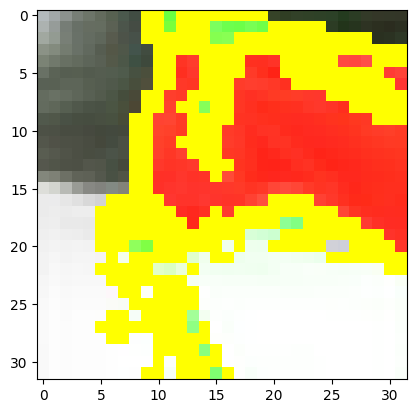

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=6, hide_rest=False)
plt.imshow(mark_boundaries((temp).astype('uint8'), mask))

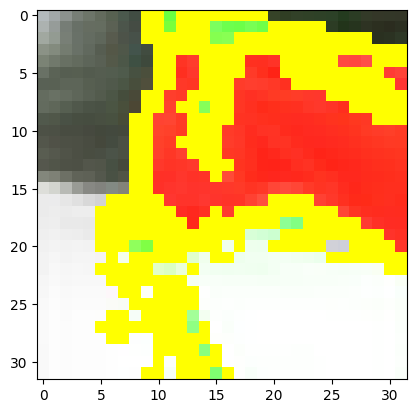

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries((temp).astype('uint8'), mask))

In [ ]:
explanation = explainer.explain_instance(
    images[2].astype('uint8').astype('double'), loaded_model.predict, top_labels=5, hide_color=0, num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


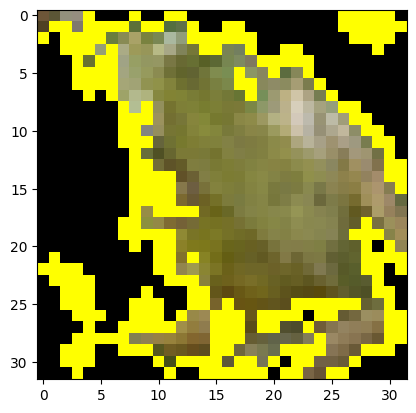

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=2, hide_rest=True)
plt.imshow(mark_boundaries((temp).astype('uint8'), mask))

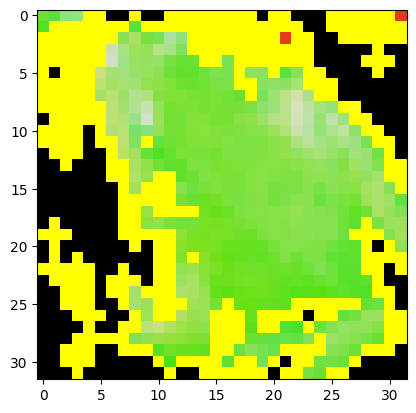

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=6, hide_rest=True)
plt.imshow(mark_boundaries((temp).astype('uint8'), mask))

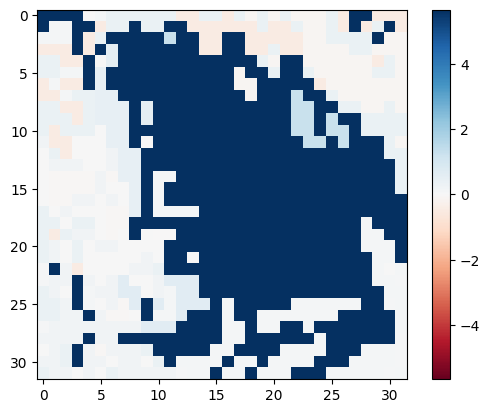

In [ ]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

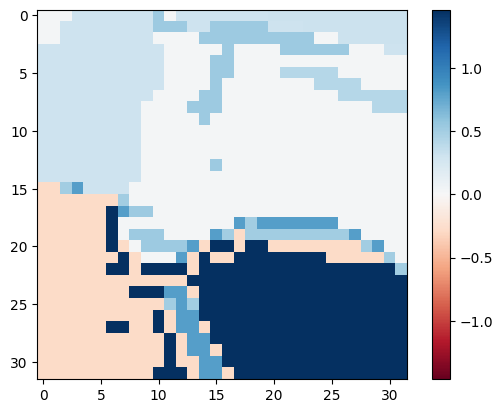

In [ ]:
#Select the same class explained on the figures above.
ind =  explanation_wrong_prediction.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation_wrong_prediction.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation_wrong_prediction.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

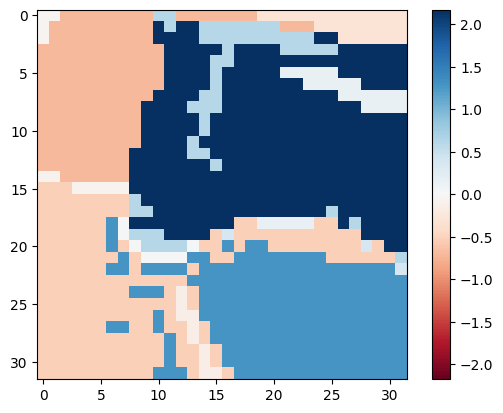

In [ ]:
#Select the same class explained on the figures above.
ind =  explanation_wrong_prediction.top_labels[2]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation_wrong_prediction.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation_wrong_prediction.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.layers import Input, Dense, Conv2D, BatchNormalization
from keras.layers import Dropout, MaxPooling2D, Rescaling, ReLU, ELU
from keras.layers import GlobalAveragePooling2D, Add, Flatten
from keras.models import Model
#import keras_tuner as kt

In [ ]:
!unzip load_model.zip -d checkpoint

Archive:  load_model.zip
   creating: checkpoint/checkpoint/
   creating: checkpoint/checkpoint/assets/
 extracting: checkpoint/checkpoint/fingerprint.pb  
  inflating: checkpoint/checkpoint/keras_metadata.pb  
  inflating: checkpoint/checkpoint/saved_model.pb  
   creating: checkpoint/checkpoint/variables/
  inflating: checkpoint/checkpoint/variables/variables.index  
  inflating: checkpoint/checkpoint/variables/variables.data-00000-of-00001  


In [ ]:
loaded_model = tf.keras.models.load_model('checkpoint/checkpoint')

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In this section we will use gradient ascent to generate an image that maximizes the score of a specific class.

Understand what makes it predict a bird in the case of a horse. One interesting experiment we could do is trying to generate the image that maximizes the score of the “bird” class. That would allow us to have an idea of what the model is looking for in bird images. This generated image would represent the representation that the model made of the fact of being a bird image.

To generate such an image, we will use the gradient ascent method. In gradient descent, we update the parameters by taking a step in the opposite direction of the gradient vector. By doing so, we reduce the value of the loss function. In gradient ascent, we will update the inputs by taking a step in the same direction as the gradient.

First, after loading the model, we need to remove the loss function in case it was part of the Keras sequential model. Indeed, we want to work directly on the class scores and not on the loss. More specifically, we want to find the input image that maximizes the score of the bird class. In our case we will not need to modify the model since its output is already the ten class scores.

The next step is to isolate the score of the bird class. Once this is done, we will compute the gradient of this bird class with respect to the pixels of the input image. This is a new approach because, up to now, we have computed gradients only on the trainable parameters of the model. However, it is also possible to compute the gradient of a formula with respect to the initial input of the model.

After having computed this gradient, we will update the pixels of the image by taking a step in the direction of the gradient, hence the term “gradient ascent”. The effect of doing so is that we are modifying the image in such a way that the score of the bird class is increasing. This is an iterative approach of finding the global maximum of the bird class with respect to the input image. We repeat the pixel updates for a given number of steps.
It is possible to initialize the input image with a random image or with a blank image.

In the example below, we are automating this gradient ascent approach to compute the image that maximizes each class of the dataset. Then, we display nine of the generated images. We are initializing the image with a blank white image, but we could also initialize it with random pixel values. Below
is the corresponding code:


In [ ]:
from keras import backend as K

#model_output = loaded_model.output[:, 2]
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
images=[]

In [ ]:
for class_index in range(len(labels)):
  input_img_data = tf.Variable(np.random.random((1, 32, 32, 3)) * 20 + 128., dtype=tf.float32)
  step = .5  # Step size for gradient ascent
  for i in range(1000):
      with tf.GradientTape() as tape:
          # Make sure that the image is being watched by the gradient tape
          tape.watch(input_img_data)
          # Forward pass
          output = loaded_model(input_img_data)
          # Loss for the 'cat' class
          loss_value = output[0, class_index]

      # Compute gradients
      grads = tape.gradient(loss_value, input_img_data)

      # Normalize gradients
      grads /= (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)

      # Update image
      input_img_data = input_img_data.assign_add(grads * step)
  img = input_img_data.numpy()[0]
  img = np.clip(img, 0, 255).astype('uint8')
  images.append(img)

We can see in this output the kind of high level features that make the model predict one class rather than another one. This visualization gives us an idea of the features that the classifier uses look like.


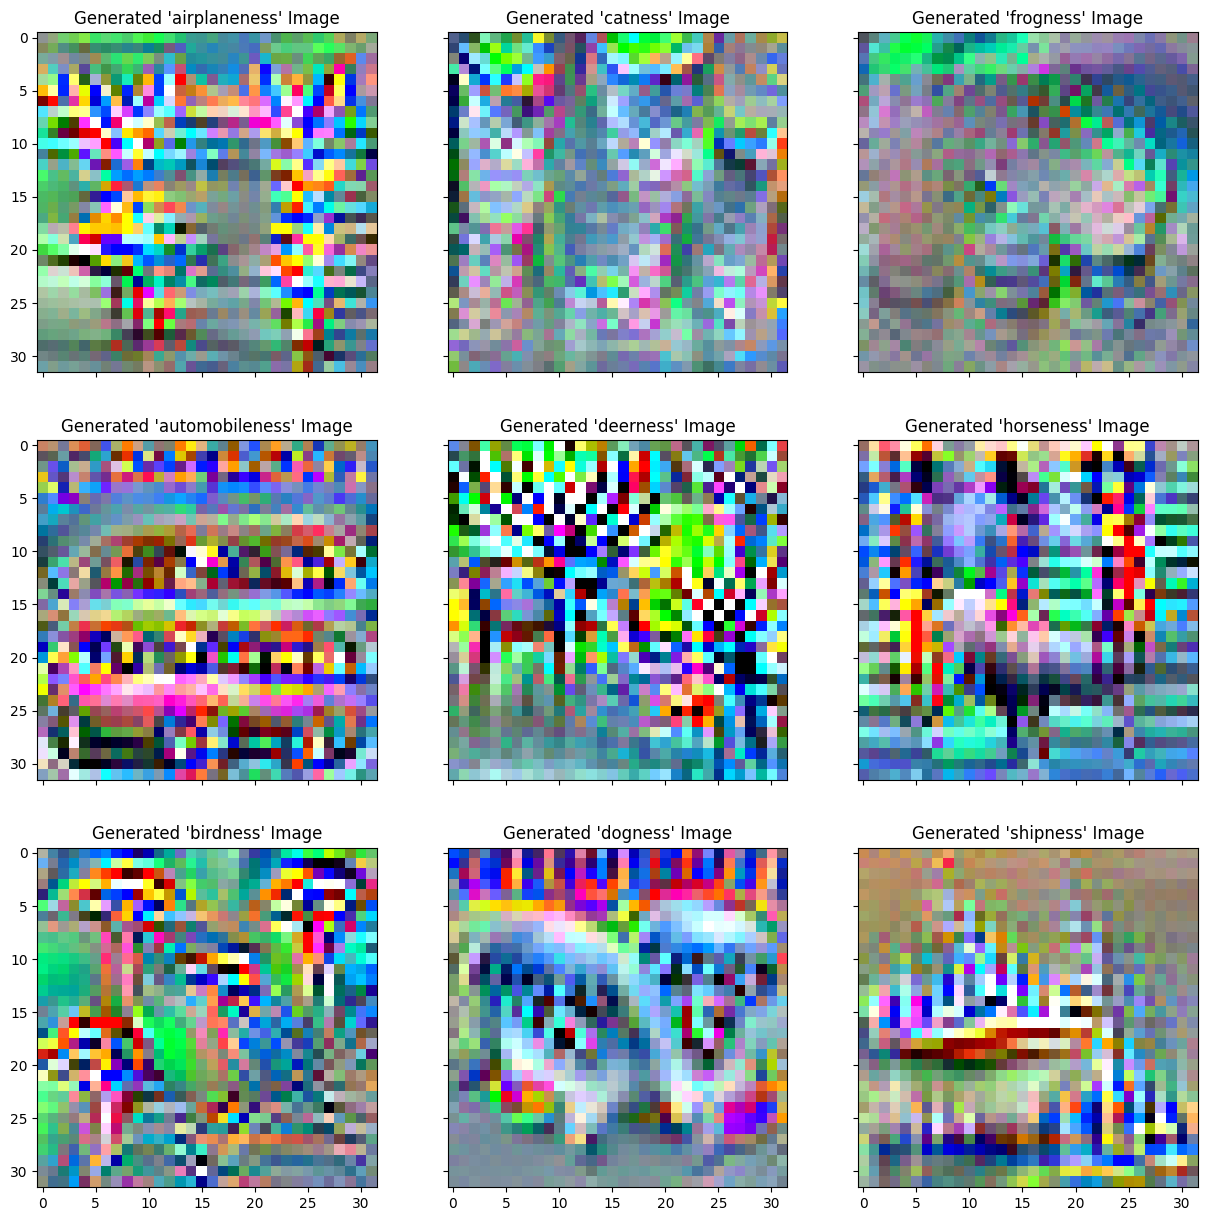

In [ ]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15,15))
for i in range(9):
  img = images[i]
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ax[i%3][i//3].imshow(img_rgb)
  ax[i%3][i//3].set_title(f"Generated '{labels[i]}ness' Image")
  i += 1
plt.show()


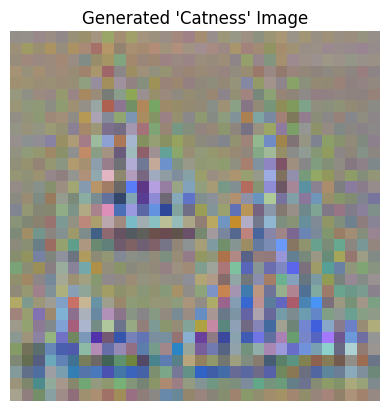

In [ ]:
import cv2

# Convert from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Now display the image
plt.imshow(img_rgb)
plt.title("Generated 'Catness' Image")
plt.axis('off')
plt.show()

In [ ]:
images=[]
for class_index in range(len(labels)):
  ini_img = np.zeros([1,32,32,3],dtype=np.float32)
  ini_img.fill(255.)

  input_img_data = tf.Variable(ini_img, dtype=tf.float32)
  step = .5  # Step size for gradient ascent
  for i in range(1000):
      with tf.GradientTape() as tape:
          # Make sure that the image is being watched by the gradient tape
          tape.watch(input_img_data)
          # Forward pass
          output = loaded_model(input_img_data)
          # Loss for the 'cat' class
          loss_value = output[0, class_index]

      # Compute gradients
      grads = tape.gradient(loss_value, input_img_data)

      # Normalize gradients
      grads /= (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)

      # Update image
      input_img_data = input_img_data.assign_add(grads * step)
  img = input_img_data.numpy()[0]
  img = np.clip(img, 0, 255).astype('uint8')
  images.append(img)

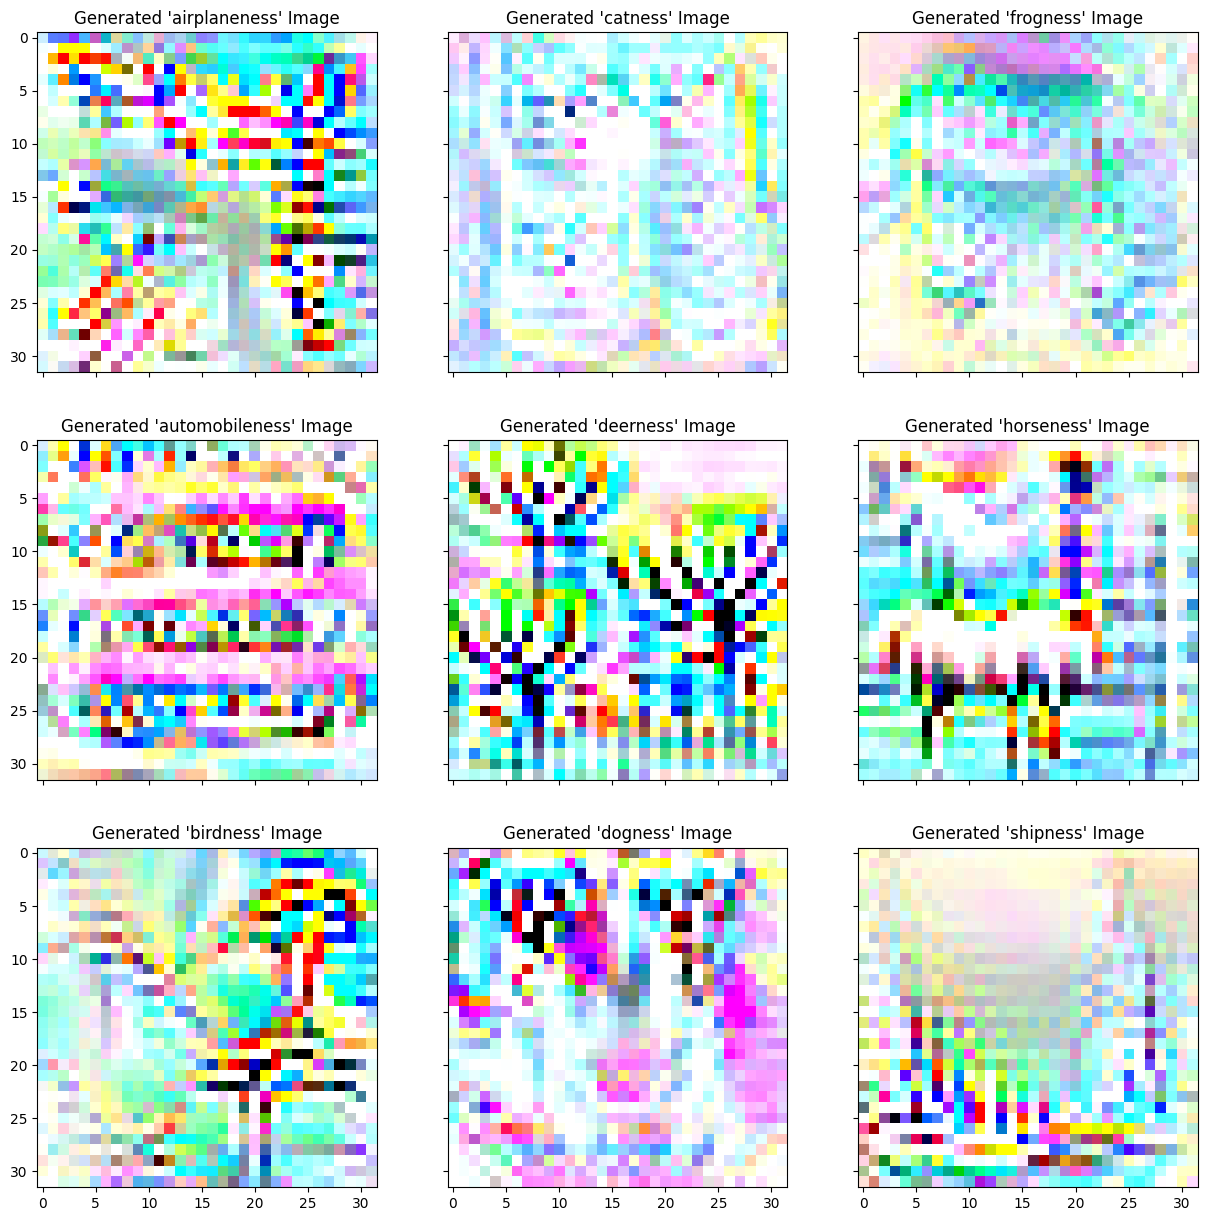

In [ ]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15,15))
for i in range(9):
  img = images[i]
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ax[i%3][i//3].imshow(img_rgb)
  ax[i%3][i//3].set_title(f"Generated '{labels[i]}ness' Image")
  i += 1
plt.show()
